<a href="https://colab.research.google.com/github/ducanhho2296/building_segmentation/blob/main/osmnx_analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone  git@github.com/ducanhho2296/building_segmentation.git

In [2]:
# !pip install geopandas
# !pip install osmnx
# !pip install rasterio

In [3]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain


In [4]:
food_tags = ["restaurant",
        "fast_food",
        "food_court",
        "ice_cream",
        "bakery",
        "cafe",
        "bar",
        "pub",
        "biergarten"]

school_tags = ["kindergarten",
          "driving_school",
          "language_school",
          "college",
          "music_school",
          "university",
          "library",
          "toy_library",
          "school"]
 
healthcare_tags = ["clinic",
              "dentist",
              "doctors",
              "pharmacy",
              "baby_hatch",
              "hospital",
              "nursing_home",
              "social_facility",
              "veterinary"]

entertainment_tags = ["arts_centre",
                 "brothel",
                 "casino",
                 "cinema",
                 "community_centre",
                 "conference_centre",
                 "events_venue",
                 "fountain",
                 "gambling",
                 "love_hotel",
                 "nightclub",
                 "planetarium",
                 "public_bookcase",
                 "social_centre",
                 "stripclub",
                 "studio",
                 "swingerclub",
                 "theatre"]

public_tags = ["courthouse",
          "police",
          "post_office",
          "fire_station",
          "post_depot",
          "prison",
          "ranger_station",
          "townhall",
          "post_box"]

roads = ["motorwoy",
        "trunk",
        "primary",
        "secondary",
        "tertiary",
        "unclassified",
        "residential",
        "motorway_link",
        "trunk_link",
        "primary_link",
        "secondary_link",
        "tertiary_link",
        "living_street",
        "service",
        "pedestrian",
        "track",
        "bus_guideway",
        "escape",
        "raceway",
        "road",
        "busway",
        "footway",
        "bridleway",
        "steps",
        "corridor",
        "path",
        "cycleway"]

In [5]:
%%capture
city = "Hannover Mitte"

buildings = ox.geometries_from_place(query=city, tags={'building':True})

food = ox.geometries_from_place(query=city, tags={"amenity": food_tags})
school = ox.geometries_from_place(query=city, tags={"amenity": school_tags})
healthcare = ox.geometries_from_place(query=city, tags={"amenity": healthcare_tags})
entertainment = ox.geometries_from_place(query=city, tags={"amenity": entertainment_tags})
public = ox.geometries_from_place(query=city, tags={"amenity": public_tags})

retail = ox.geometries_from_place(query=city, tags={"shop": True})
sport = ox.geometries_from_place(query=city, tags={"sport": True})
leisure = ox.geometries_from_place(query=city, tags={'leisure':True})
highway = ox.geometries_from_place(query=city, tags={'highway':roads})

In [6]:
food["function"] = "food"
school["function"] = "school"
healthcare["function"] = "healthcare"
entertainment["function"] = "entertainment"
public["function"] = "public"

retail["function"] = "retail"
sport["function"] = "sport"
leisure["function"] = "leisure"
highway["function"] = "highway"


food_buildings = buildings.sjoin(food, how="left")
school_buildings = buildings.sjoin(school, how="left")
healthcare_buildings = buildings.sjoin(healthcare, how="left")
entertainment_buildings = buildings.sjoin(entertainment, how="left")
public_buildings = buildings.sjoin(public, how="left")
retail_buildings = buildings.sjoin(retail, how="left")

#---------------------------------------------------------

buildings.reset_index(inplace=True)
food_buildings.reset_index(inplace=True)
school_buildings.reset_index(inplace=True)
healthcare_buildings.reset_index(inplace=True)
entertainment_buildings.reset_index(inplace=True)
public_buildings.reset_index(inplace=True)
retail_buildings.reset_index(inplace=True)

#-----------------------------------------------------------
buildings["function"] = np.nan
#------------------------------------------------------------
buildings.function.fillna(food_buildings.function,inplace=True)
buildings.function.fillna(school_buildings.function,inplace=True)
buildings.function.fillna(healthcare_buildings.function,inplace=True)
buildings.function.fillna(entertainment_buildings.function,inplace=True)
buildings.function.fillna(public_buildings.function,inplace=True)
buildings.function.fillna(retail_buildings.function,inplace=True)
print(buildings.function.value_counts())

function
retail           694
food             416
school           102
entertainment     79
healthcare        71
public            44
Name: count, dtype: int64


#### save buildings geodataframe for using later

####Plotting

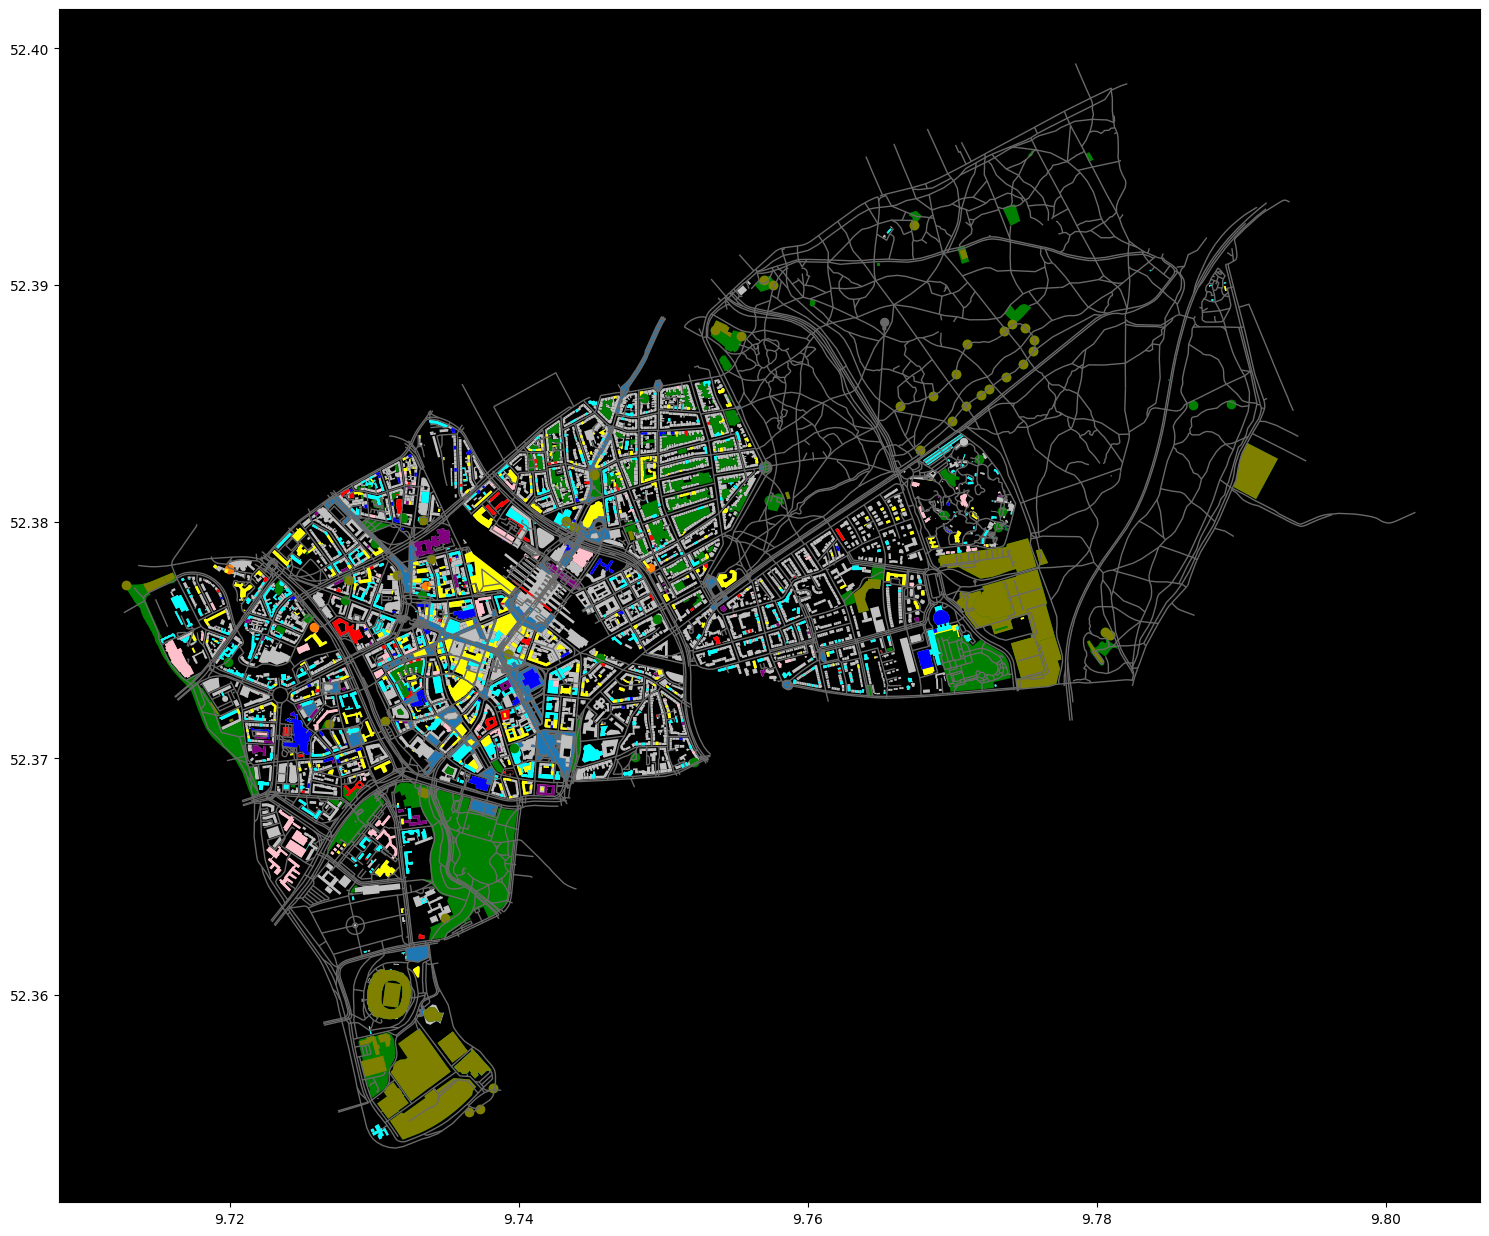

In [7]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_facecolor((0.0, 0.0, 0.0))

highway.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buildings.plot(ax=ax, facecolor='silver')
buildings[buildings.function == "food"].plot(ax=ax,color='yellow')
buildings[buildings.function == "retail"].plot(ax=ax,color='cyan')
buildings[buildings.function == "healthcare"].plot(ax=ax,color='red')
buildings[buildings.function == "entertainment"].plot(ax=ax,color='blue')
buildings[buildings.function == "school"].plot(ax=ax,color='pink')
buildings[buildings.function == "public"].plot(ax=ax,color='purple')
leisure.plot(ax=ax,color='green')
sport.plot(ax=ax,color='olive')
plt.tight_layout()

In [9]:
city_bbox = buildings.total_bounds
city_bbox

array([ 9.7131867, 52.3539034,  9.7889933, 52.3924941])

In [16]:
%cd /building_segmentation
!git pull

[Errno 2] No such file or directory: '/building_segmentation'
/home/ducanh
fatal: not a git repository (or any parent up to mount point /home)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [23]:
%cd building_segmentation
import geopandas as gpd
from shapely.geometry import Point
import random
from region_sampling import Gridgenerating
# Define the city and its bounding box
city_bbox = buildings.total_bounds

# Define the grid spacing (in degrees)
spacing_x = 0.0015  # Adjust the value based on the desired coverage
spacing_y = 0.0015  # Adjust the value based on the desired coverage

# Generate grid points and create bbox from grid cell within the city

Grid_generating = Gridgenerating(city_df=buildings)
#get grid_points
grid_points = Grid_generating.grid_points_in_bbox(bbox=city_bbox)

[Errno 2] No such file or directory: 'building_segmentation'
/home/ducanh/building_segmentation


In [14]:
len(grid_points)

1404

## Plotting grid_points 

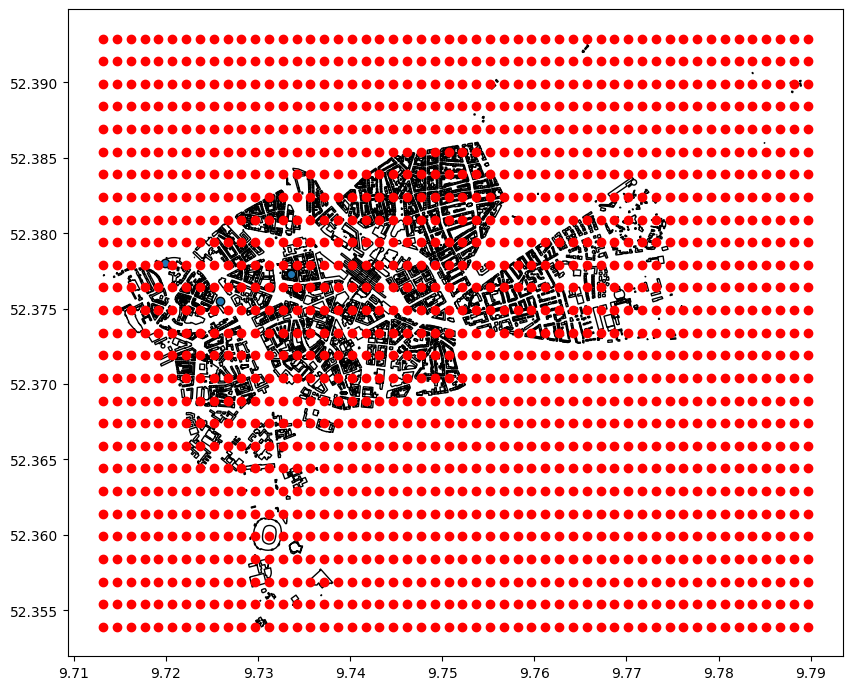

In [ ]:
import matplotlib.pyplot as plt

# Visualize the bounding box and grid points
fig, ax = plt.subplots(figsize=(10,10))


# Plot the city boundary
buildings.plot(ax=ax, edgecolor="black", facecolor="none")

# Extract x and y coordinates from the grid_points list
x_coords = [point.x for point in grid_points]
y_coords = [point.y for point in grid_points]

# Plot the grid points
ax.scatter(x_coords, y_coords, color="red", marker="o")

# Display the plot
plt.show()


### drawing random bbox created from grid cell

#### buildings_within is the buildings dataframe inside BBox => use to plot bbox figure
bbox_df is used for visualizing the location of BBox 

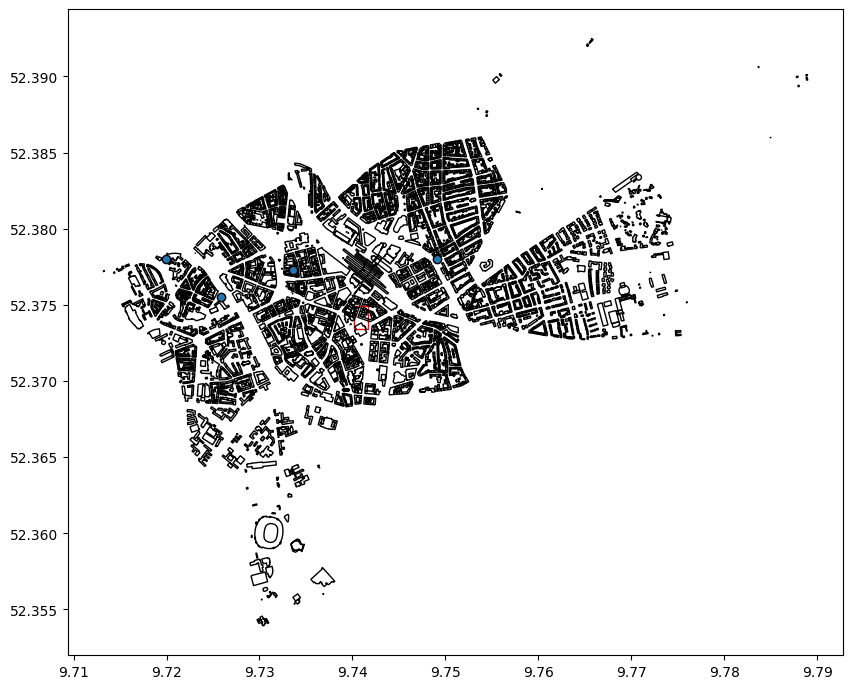

In [ ]:
buildings_within, bbox_df = Grid_generating.capture_square_bbox(point_position=526) #if print more fig, just set point_position = loop iteration
fig, ax = plt.subplots(figsize=(10,10))
bbox_df.plot(ax=ax, alpha=1, edgecolor='red', facecolor='none')
buildings.plot(ax=ax, edgecolor='black', facecolor='none')

# show the plot
plt.show()


###Drawing square BBox region 

In [ ]:
!mkdir /content/images
!mkdir /content/labels

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


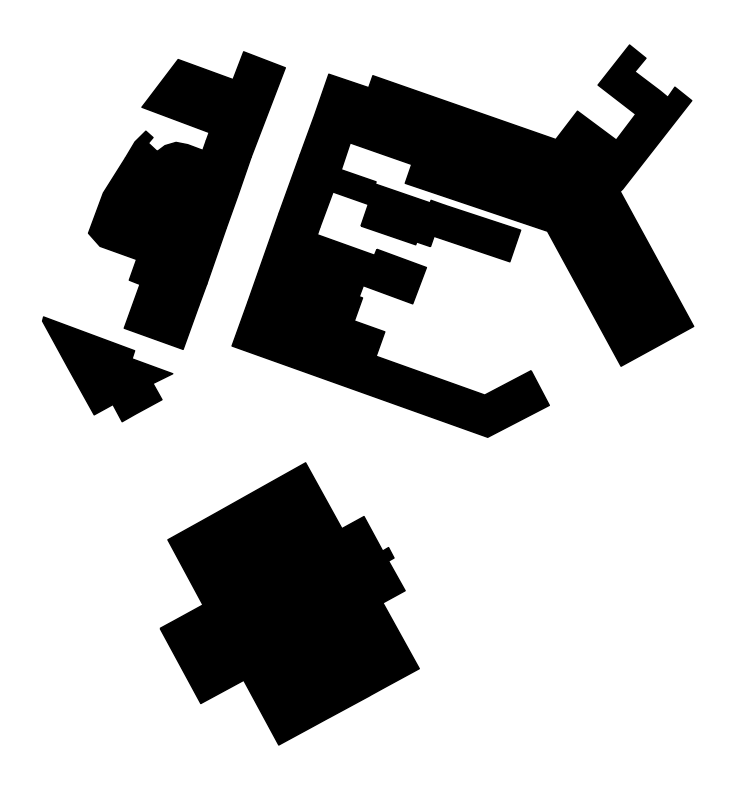

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
buildings_within.plot(ax=ax, edgecolor='black', facecolor='black')
plt.axis('off')
  # # header = ["geometry", "mapping_geo"]
  # # buildings_inbbox.to_csv('/content/figures/label {}.csv'.format(i), columns=header)
plt.savefig('/content/images/figure.jpg',dpi=100, format="jpg", bbox_inches='tight')

# show the plot
plt.show()

###encode image to label image format

In [ ]:
%cd /content/building_segmentation/
from label_image import label_image
import cv2

img = cv2.imread("/content/images/figure.jpg")
print(img.shape)

In [ ]:
path = "/content/labels/labels.tif"
label_image(buildings_within, img, write_path=path)

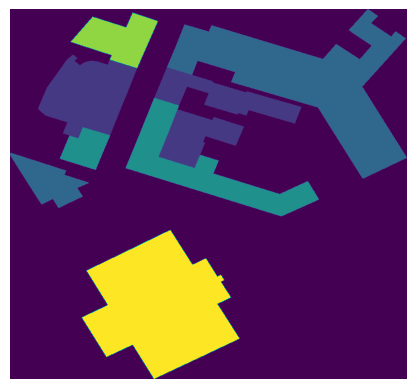

In [ ]:
import rasterio
from matplotlib import pyplot as plt
# Open the label image in read mode
with rasterio.open(path, 'r') as src:
    # Read the label image data
    label_image = src.read(1)
    plt.axis('off')

    # Display the label image as a plot
    plt.imshow(label_image)
    plt.show()

#### resize images 